<a href="https://colab.research.google.com/github/Kim-Dong-Jun99/DSTermProject/blob/main/term_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# commit and merge test

In [4]:
#공유 드라이브 연동

from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount = True)  # 공유 드라이브

df_2015_path = r'/content/gdrive/Shareddrives/data_science/dataset/2015.csv'
df_2016_path = r'/content/gdrive/Shareddrives/data_science/dataset/2016.csv'
df_2017_path = r'/content/gdrive/Shareddrives/data_science/dataset/2017.csv'


Mounted at /content/gdrive


In [5]:
df_2015 = pd.read_csv(df_2015_path)
df_2016 = pd.read_csv(df_2016_path)
df_2017 = pd.read_csv(df_2017_path)

# TermProject

## Source and explanation of the dataset

The dataset is 'World Happiness Report' from Kaggle. 'World Happiness Report' has data of world happiness from 2015 to 2019

https://www.kaggle.com/datasets/unsdsn/world-happiness?datasetId=894&sortBy=voteCount&searchQuery=predict

The columns of each dataset include 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual' etc.

It is arranged in descending order according to the happiness score. The happiness score is the sum of the scores of other numerical features (except for Hapiness Rank).

The World Happiness Report is a landmark survey of the state of global happiness. The reports review the state of happiness in the world today and show how the


# Objective of our analysis
Analyze dataset to figure out characteristics of each continent in dataset then predict continent value of countries in dataset of 2017 using 2015, 2016 dataset for training

We will use clustering and classification algorithm to predict continent of countries in dataset of 2017 using 2015, 2016 happiness data report

Also, we will automate procedure of choosing best combination of scaler and algorithm that gives best result

# 데이터 통일하는 과정
# process of unification

## 각 데이터세트마다 존재하는 나라가 달라서 데이터세트에 있는 나라들을 통일하기 위한 코드
## countries in each datasets are differenet, must be unificated before modeling 

In [6]:
# 각 데이터프레임들의 나라를 저장하는 리스트
# list for saving countries in each datasets
country_15 = []
country_16 = []
country_17 = []

for i in range(len(df_2015)):
    country_15.append(df_2015.iloc[i][0])

for i in range(len(df_2016)):
    country_16.append(df_2016.iloc[i][0])

for i in range(len(df_2017)):
    country_17.append(df_2017.iloc[i][0])

# 공통된 나라를 저장하기 위한 리스트
# list to save common countries in dataset
common = []
for i in country_15:
    if (i  in country_17 and i in country_16):
        common.append(i)


common.sort()

# 공통된 나라만 데이터세트에 남기기 위해서 공통으로 존재하지 않는 나라를 저장하기 위한 리스트
# list for saving countries that are non-common
drop15 = []
drop16 = []
drop17 = []

for i in range(len(df_2015)):
    if(df_2015.iloc[i][0] not in common):
        drop15.append(i)

for i in range(len(df_2016)):
    if(df_2016.iloc[i][0] not in common):
        drop16.append(i)

for i in range(len(df_2017)):
    if(df_2017.iloc[i][0] not in common):
        drop17.append(i)

print(len(df_2015))
print(len(df_2016))
print(len(df_2017))




158
157
155


# 공통된 나라가 common 리스트에 저장되었고, common 리스트에 속하지 않는 나라들은 drop
# code for dropping countrires that are not in common list

In [7]:
# drop15,drop16, drop17에 드랍해야할 나라들이 들어가있는데 그것을 적용해서 드랍할 나라들 드랍하기
# drop countries in each dataframe
df_2015.drop(drop15, axis = 0,inplace=True)
df_2016.drop(drop16, axis = 0,inplace=True)
df_2017.drop(drop17, axis = 0,inplace=True)

print(len(df_2015))
print(len(df_2016))
print(len(df_2017))


146
146
146


# 158, 157, 155개였던 나라들이 146개로 통일된 것을 볼 수 있다
# you can see that number of countries in each dataset is identical

# 이제 서로 다른 컬럼 명을 통일하기 인덱스 정리하기
# now we should unificate name of columns and reset index

In [8]:
# 나라들이 드랍됐으니, index를 정리
# resetting index because countries has been dropped

df_2015.reset_index(drop=True,inplace = True)
df_2016.reset_index(drop=True, inplace = True)
df_2017.reset_index(drop=True, inplace = True)



In [9]:
# 2017년도 데이터의 컬럼 명들이 다르기에 컬럼 명을 통일해주는 코드
# column name in 2017 is different, code for changing 2017 data column name
df_2017.rename(columns = {"Happiness.Rank":"Happiness Rank", "Happiness.Score":"Happiness Score","Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                          "Health..Life.Expectancy.":"Health (Life Expectancy)","Trust..Government.Corruption.":"Trust (Government Corruption)","Dystopia.Residual":"Dystopia Residual"}, inplace=True)
# 표준편차 같은 의미 없는 컬럼 들은 드랍하기
# dropping meaningless columns
c_drop15 = ['Standard Error']
c_drop16 = ['Lower Confidence Interval','Upper Confidence Interval']
c_drop17 = ['Whisker.high', 'Whisker.low']

df_2015.drop(c_drop15, axis=1,inplace=True)
df_2016.drop(c_drop16, axis=1,inplace=True)
df_2017.drop(c_drop17, axis=1,inplace=True)

# 칼럼까지 통일했으니, 2017년도에 없는 지역 컬럼을 추가해줘야하고, region 컬럼에 있는 값을 대륙으로 변경해야한다

# column name is unificated, now add region column in 2017 data and value in region column must be continent

In [10]:
# 2017년도 데이터에 지역 컬럼을 추가해주기 위한 딕셔너리
# dictonary for adding region data in 2017 dataframe
region_dic = {}
# 각 년도별 데이터프레임에 있는 나라들이 동일하므로, 2017년도 데이터에 지역 컬럼을 추가해주는 코드
# adding region column to dataset of 2017 dataframe
for i in range(len(df_2016)):
  country = df_2016.iloc[i][0]
  region = df_2016.iloc[i][1]
  region_dic[country] = region

for i in range(len(df_2017)):
  df_2017.loc[i,'Region'] = region_dic[df_2017.loc[i,'Country']]

df_2017.head()



,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


# 2017년도 데이터에 지역 컬럼이 추가된 것을 확인할 수 있다, 이제 지역 컬럼에 있는 값을 지역이 아니라 대륙으로 변경해주자

# you can see that region column has been added to 2017 dataframe, now values in region column must be continent, 

In [11]:
my_list=list()
# 지역 값을 대륙으로 변경시켜주는 코드
# changing region value into continent value
for index in df_2015["Region"]:
    if "Africa" in index:
        my_list.append("Africa")
    elif "Europe" in index:
        my_list.append("Europe")
    elif "Antartica"in index:
        my_list.append("Antartica")
    elif "Australia"in index:
        my_list.append("Australia")
    elif "North America"in index:
        my_list.append("North America")
    elif "Latin America" in index:
        my_list.append("South America")
    elif "Asia" in index:
        my_list.append("Asia")
df_2015["Region"]=my_list

my_list=list()
for index in df_2016["Region"]:
    if "Africa" in index:
        my_list.append("Africa")
    elif "Europe" in index:
        my_list.append("Europe")
    elif "Antartica"in index:
        my_list.append("Antartica")
    elif "Australia"in index:
        my_list.append("Australia")
    elif "North America"in index:
        my_list.append("North America")
    elif "Latin America" in index:
        my_list.append("South America")
    elif "Asia" in index:
        my_list.append("Asia")
df_2016["Region"]=my_list

my_list=list()
for index in df_2017["Region"]:
    if "Africa" in index:
        my_list.append("Africa")
    elif "Europe" in index:
        my_list.append("Europe")
    elif "Antartica"in index:
        my_list.append("Antartica")
    elif "Australia"in index:
        my_list.append("Australia")
    elif "North America"in index:
        my_list.append("North America")
    elif "Latin America" in index:
        my_list.append("South America")
    elif "Asia" in index:
        my_list.append("Asia")
df_2017["Region"]=my_list


In [12]:
# 이제 데이터 세트를 보기 편하게 해주기 위해서 컬럼 순서를 2015년 데이터프레임에 맞춰주는 코드
# resetting order of dataframe column to 2015 data
df_2016 = df_2016[['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]
df_2017 = df_2017[['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]

In [13]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [14]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [15]:
df_2017.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Norway,Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,Denmark,Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,Iceland,Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,Switzerland,Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,Finland,Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182


# 데이터 프레임 통일 끝!
# dataframe unifiacation done

In [16]:
# 처리한 데이터 프레임을 재활용하기 위해서 피클 파일로 저장하는 코드
# code for saving data into pickle file

# df_2015.to_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2015.pkl')
# df_2016.to_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2016.pkl')
# df_2017.to_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2017.pkl')

In [17]:
cleaned_2015 = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2015.pkl')
cleaned_2016 = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2016.pkl')
cleaned_2017 = pd.read_pickle('/content/gdrive/Shareddrives/data_science/dataset/cleaned_2017.pkl')

# Big data end to end process

## data inspection


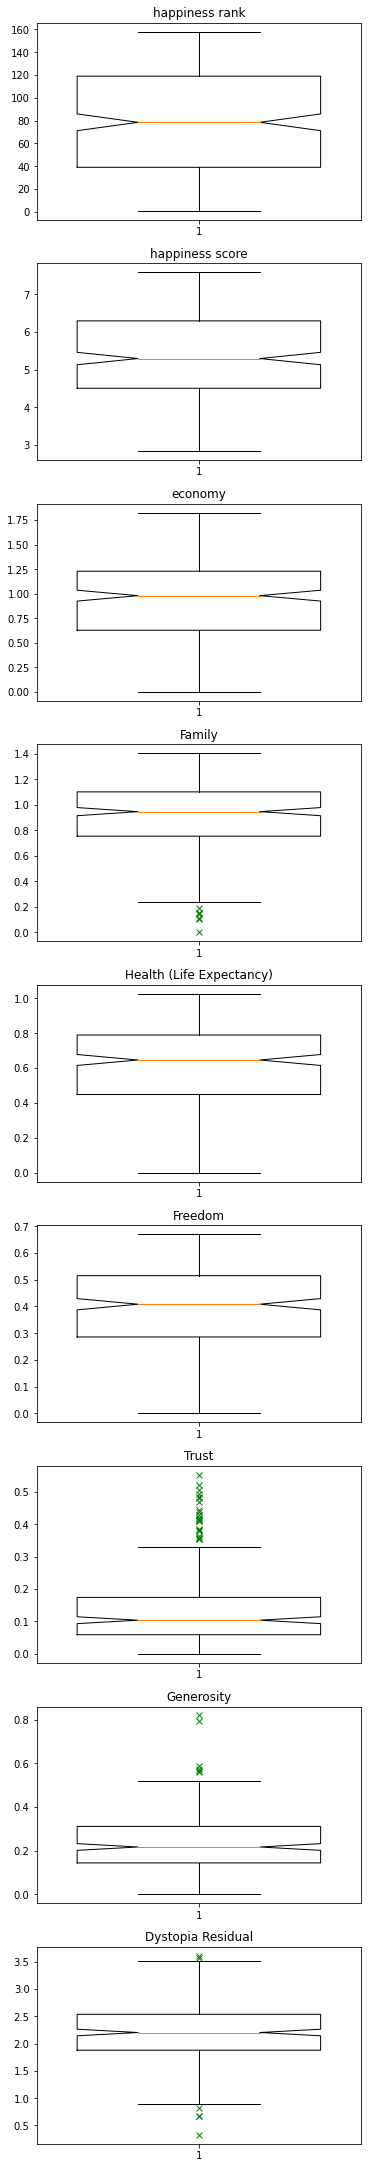

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

total = cleaned_2015.append(cleaned_2016, sort =False)
total.append(cleaned_2017, sort = False)
fig, axes = plt.subplots(nrows=9, ncols=1, constrained_layout=True, figsize = (5,30))
fig.set_facecolor("white")
axes[0].boxplot(total['Happiness Rank'], sym='gx', widths = 0.75, notch = True)
axes[0].set_title("happiness rank")
axes[1].boxplot(total['Happiness Score'], sym='gx', widths = 0.75, notch = True)
axes[1].set_title("happiness score")
axes[2].boxplot(total['Economy (GDP per Capita)'], sym='gx', widths = 0.75, notch = True)
axes[2].set_title("economy")
axes[3].boxplot(total['Family'], sym='gx', widths = 0.75, notch = True)
axes[3].set_title("Family")
axes[4].boxplot(total['Health (Life Expectancy)'], sym='gx', widths = 0.75, notch = True)
axes[4].set_title("Health (Life Expectancy)")
axes[5].boxplot(total['Freedom'], sym='gx', widths = 0.75, notch = True)
axes[5].set_title("Freedom")
axes[6].boxplot(total['Trust (Government Corruption)'], sym='gx', widths = 0.75, notch = True)
axes[6].set_title("Trust")
axes[7].boxplot(total['Generosity'], sym='gx', widths = 0.75, notch = True)
axes[7].set_title("Generosity")
axes[8].boxplot(total['Dystopia Residual'], sym='gx', widths = 0.75, notch = True)
axes[8].set_title("Dystopia Residual")
plt.show()

## number of countries in each Regions

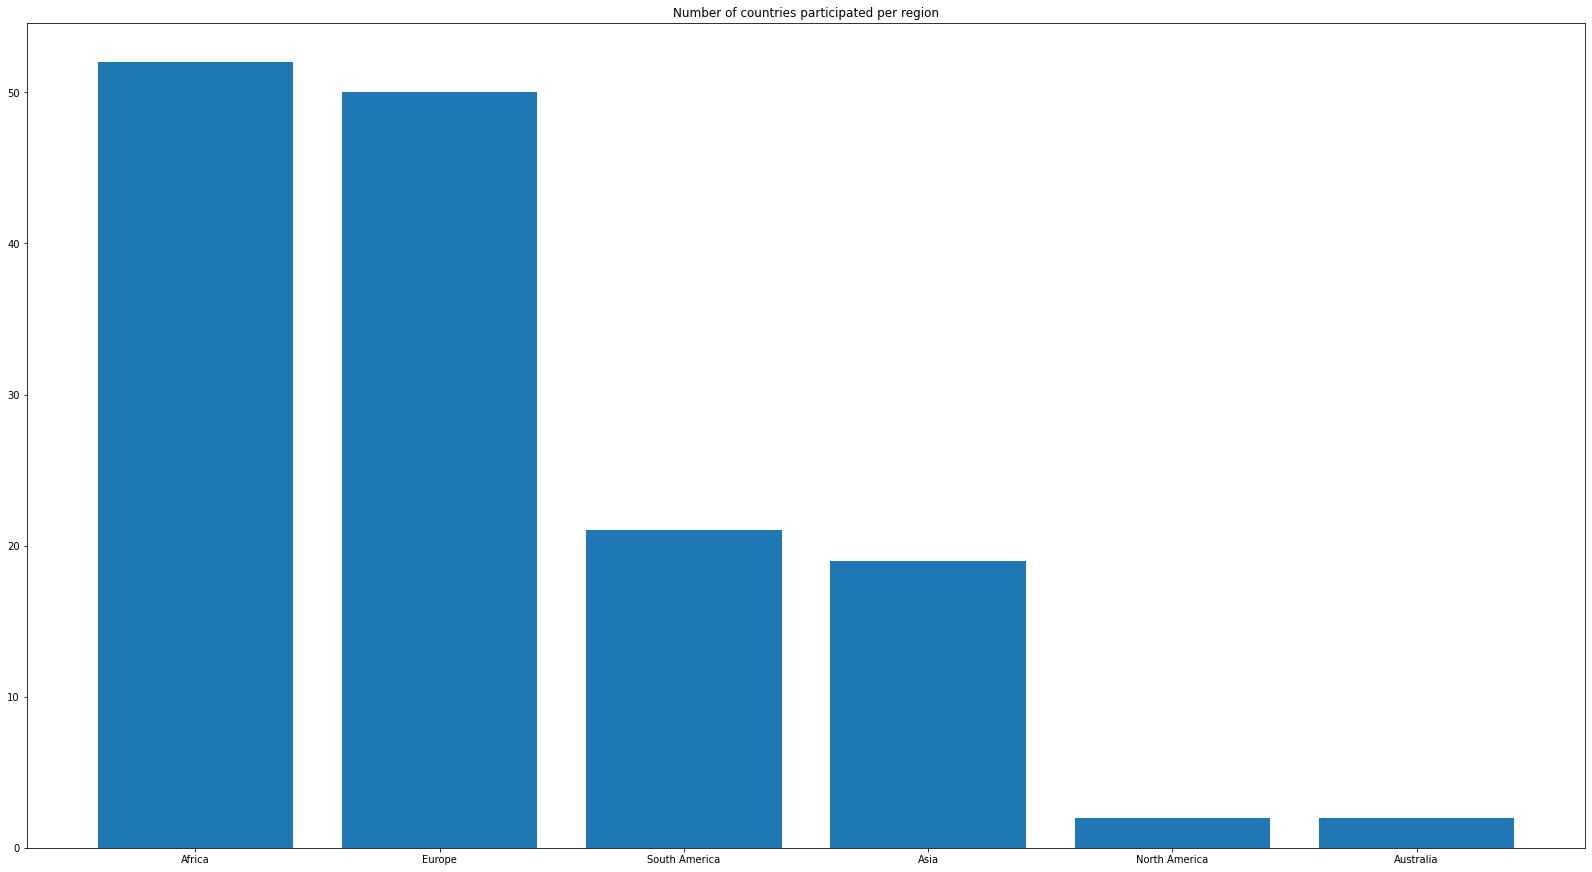

In [20]:
def sortKey(key):
    return list(df_2015['Region'].values).count(key)

regions = list(set(list(df_2015['Region'].values)))
regions.sort(key = lambda a : sortKey(a), reverse=True)
regionsCount = []
for i in regions:
    regionsCount.append(list(df_2015['Region'].values).count(i))
fig, axes = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(22,12))
fig.set_facecolor("white")
axes.bar(regions,regionsCount)
axes.set_title("Number of countries participated per region")
plt.show()

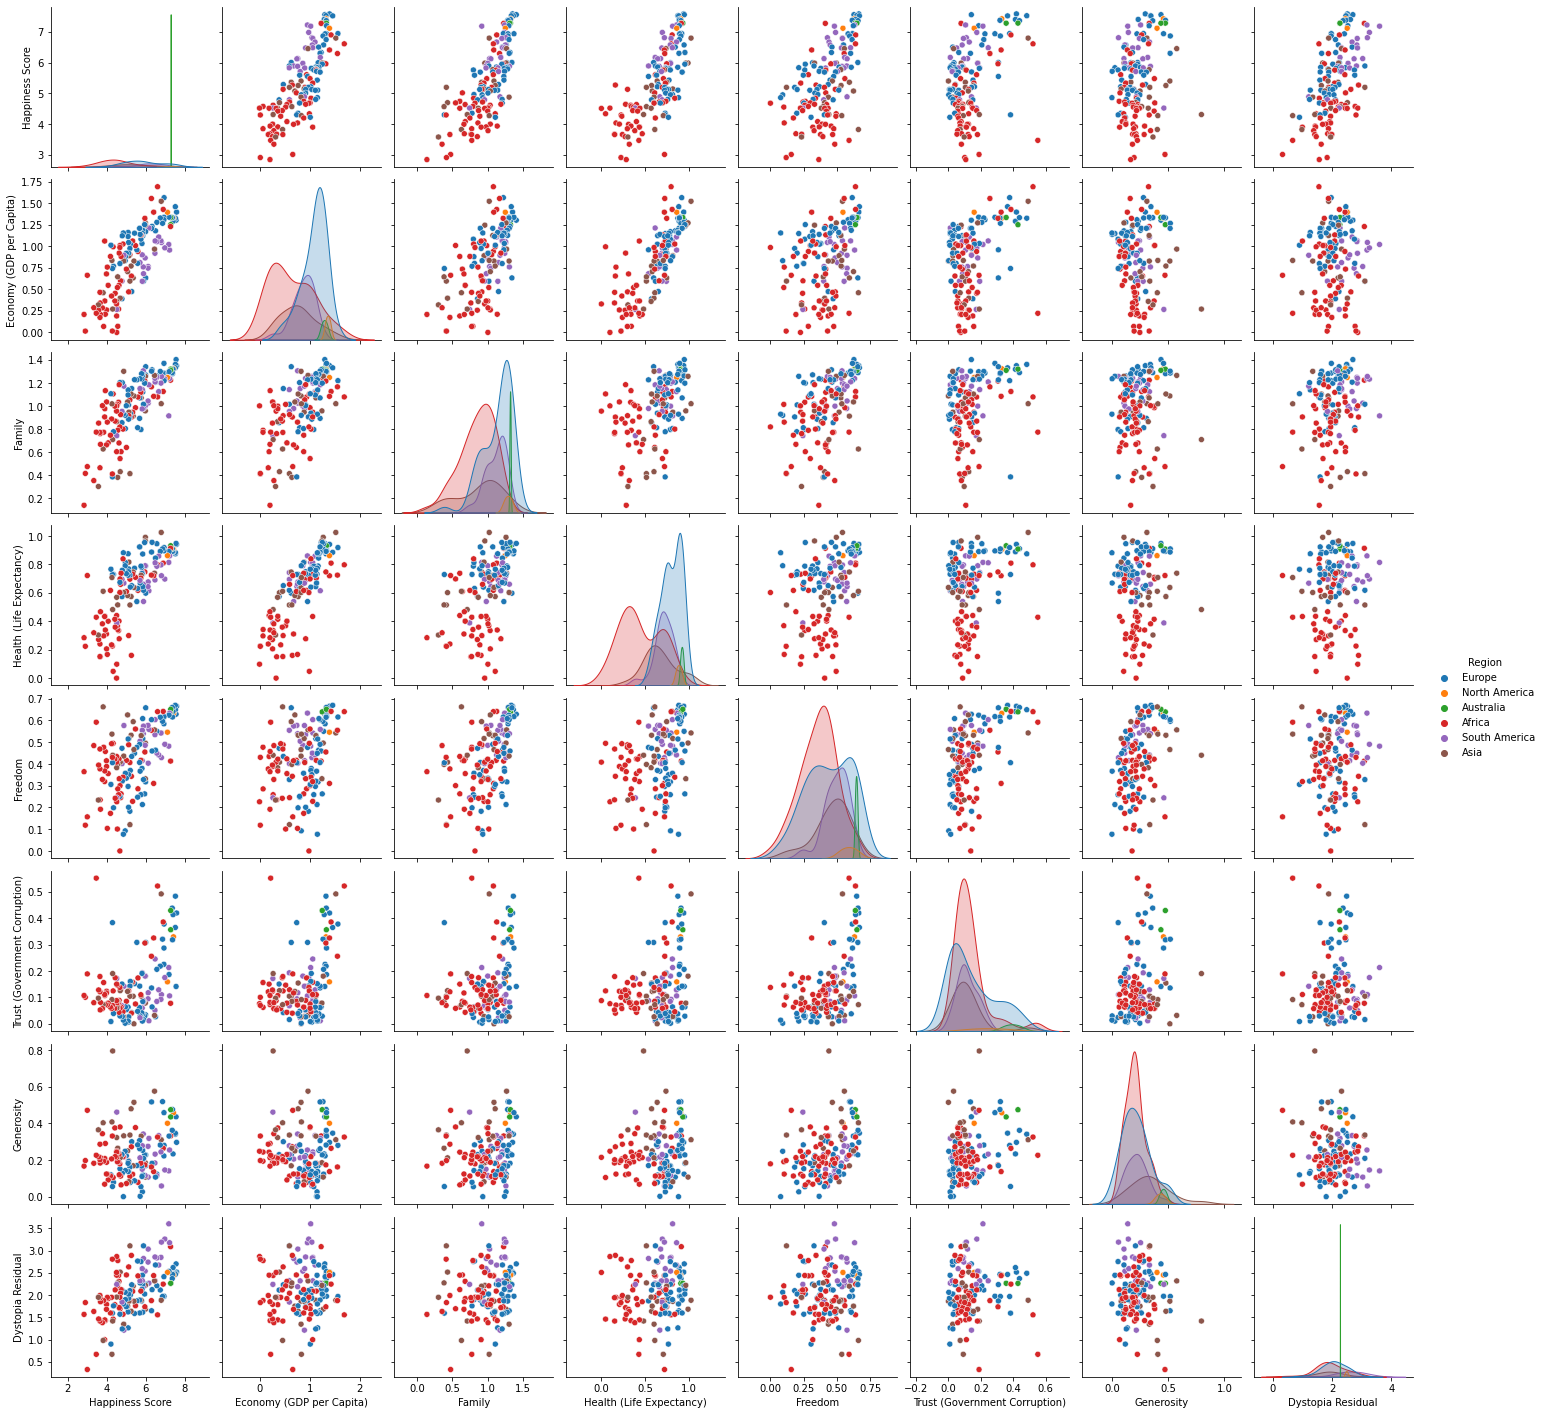

In [23]:
sns.pairplot(cleaned_2015.drop(['Country','Happiness Rank'], axis = 1), hue = 'Region')
plt.show()

# Histogram of each data columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d611a7890>,
      dtype=object)

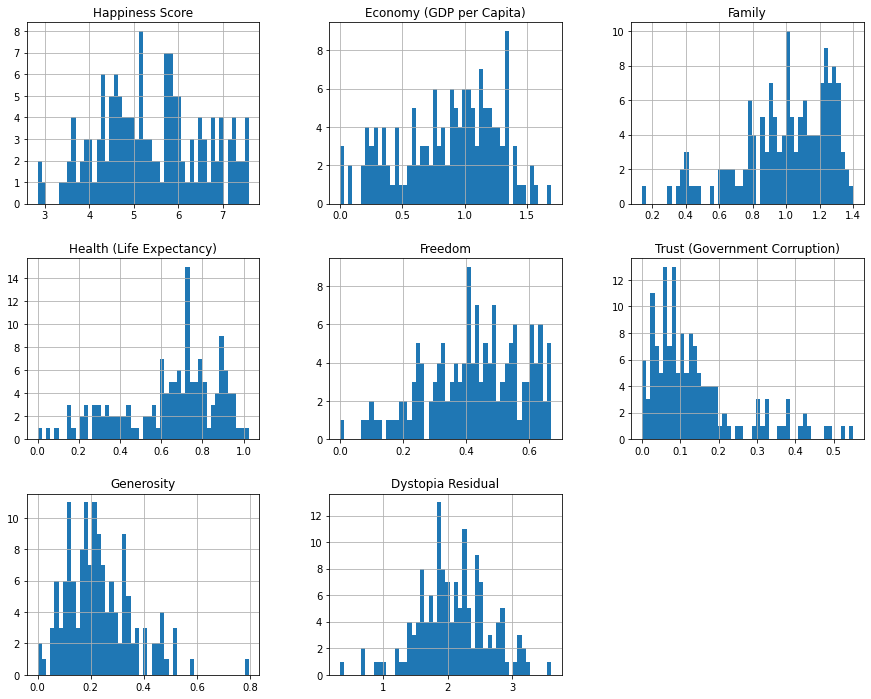

In [26]:
cleaned_2015.drop('Happiness Rank', axis = 1).hist(bins = 50, figsize = (15,12))

# correlation matrix

Text(0.5, 1.0, 'Correlation Heatmap')

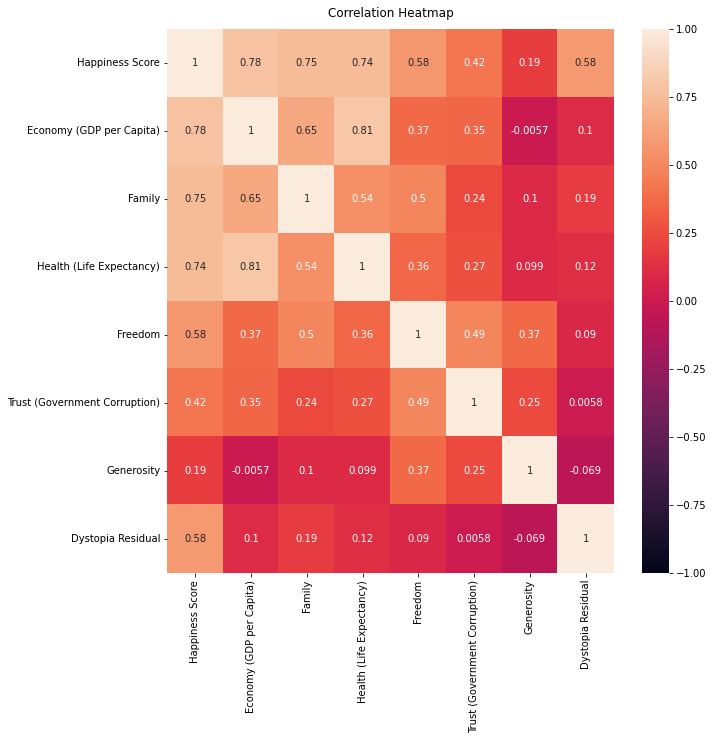

In [27]:
plt.figure(figsize=(10,10))
corr_mat = sns.heatmap(cleaned_2015.drop('Happiness Rank', axis = 1).corr(), vmin=-1, vmax=1, annot=True)
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [28]:
# 데이터 프레임 대륙별로 나누기
# dividing dataframe per country

df_asia = cleaned_2015[cleaned_2015['Region'] == 'Asia']
df_africa = cleaned_2015[cleaned_2015['Region'] == 'Africa']
df_europe = cleaned_2015[cleaned_2015['Region'] == 'Europe']
df_southAmerica = cleaned_2015[cleaned_2015['Region'] == 'South America']
df_northAmerica = cleaned_2015[cleaned_2015['Region'] == 'North America']
df_australia = cleaned_2015[cleaned_2015['Region'] == 'Australia']


In [29]:
cleaned_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        146 non-null    object 
 1   Region                         146 non-null    object 
 2   Happiness Rank                 146 non-null    int64  
 3   Happiness Score                146 non-null    float64
 4   Economy (GDP per Capita)       146 non-null    float64
 5   Family                         146 non-null    float64
 6   Health (Life Expectancy)       146 non-null    float64
 7   Freedom                        146 non-null    float64
 8   Trust (Government Corruption)  146 non-null    float64
 9   Generosity                     146 non-null    float64
 10  Dystopia Residual              146 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 12.7+ KB


In [30]:

import plotly.express as px
fig = px.scatter(df_asia,
                x = 'Health (Life Expectancy)',
                y = 'Happiness Score',
                color = 'Country', 
                template='plotly_dark',
                facet_col_wrap = 5,
                labels ={"Health (Life Expectancy)":"Health"},
                title = 'Health vs Happiness Score for Europe, with Bubble size indication of GDP',
                )
fig.show()